In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


Epoch [100/1000], Loss: 0.032644931226968765
Epoch [200/1000], Loss: 3.491530515020713e-05
Epoch [300/1000], Loss: 1.5435409295605496e-05
Epoch [400/1000], Loss: 9.265421795134898e-06
Epoch [500/1000], Loss: 6.78062679071445e-06
Epoch [600/1000], Loss: 5.435285402199952e-06
Epoch [700/1000], Loss: 4.479383278521709e-06
Epoch [800/1000], Loss: 3.709903694470995e-06
Epoch [900/1000], Loss: 3.0669405077787815e-06
Epoch [1000/1000], Loss: 2.528485765651567e-06


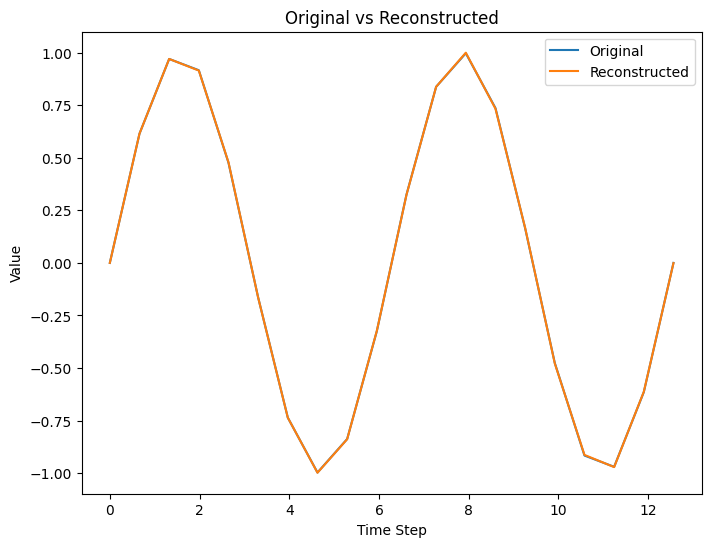

In [ ]:
class SimpleLSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, sequence_length):
        super(SimpleLSTMAutoencoder, self).__init__()
        
        # Encoder: a single LSTM layer
        self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        
        # Decoder: a single LSTM layer
        self.decoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        
        # Fully connected layer to map hidden state to the output dimension
        self.fc = nn.Linear(hidden_dim, input_dim)
        
        # Store sequence length for generating sequence in decoder
        self.sequence_length = sequence_length

    def forward(self, x):
        # Encoder
        _, (hidden, cell) = self.encoder(x)
        
        # Initialize decoder input as zeros (batch_size, 1, input_dim)
        decoder_input = torch.zeros(x.size(0), 1, x.size(2)).to(x.device)
        
        # Initialize output tensor list
        outputs = []
        
        # Decode step-by-step
        for _ in range(self.sequence_length):
            decoder_output, (hidden, cell) = self.decoder(decoder_input, (hidden, cell))
            output = self.fc(decoder_output)  # Map to input dimension
            outputs.append(output)
            decoder_input = output  # Set the next input to be the current output
        
        # Concatenate outputs along the sequence dimension
        outputs = torch.cat(outputs, dim=1)  # Shape: (batch_size, sequence_length, input_dim)
        return outputs

input_dim = 1
hidden_dim = 32
sequence_length = 20
batch_size = 10
num_layers = 1
dropout = 0.1

# Initialize model
model = SimpleLSTMAutoencoder(input_dim, hidden_dim, sequence_length)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Generate periodic data
t = np.linspace(0, 4 * np.pi, sequence_length)
data = np.sin(t).reshape(1, sequence_length, input_dim)  # Shape: (1, sequence_length, input_dim)
data = np.tile(data, (batch_size, 1, 1))  # Expand to batch size
data = torch.tensor(data, dtype=torch.float32)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Visualize the results
with torch.no_grad():
    reconstructed = model(data).numpy()

plt.figure(figsize=(8, 6))
plt.plot(t, data[0].numpy(), label='Original')
plt.plot(t, reconstructed[0], label='Reconstructed')
plt.legend()
plt.title('Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [49]:
class LSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, dropout):
        super(LSTMAutoencoder, self).__init__()
        
        # Encoder
        self.encoder_lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.encoder_fc = nn.Linear(hidden_dim, hidden_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim)  # Layer Normalization
        
        # Decoder
        self.decoder_fc = nn.Linear(hidden_dim, hidden_dim)
        self.decoder_lstm = nn.LSTM(hidden_dim, input_dim, num_layers, batch_first=True, dropout=dropout)

    def forward(self, x):
        # Encoder
        _, (h, _) = self.encoder_lstm(x)
        encoded = self.encoder_fc(h[-1])
        encoded = self.layer_norm(encoded)  # Add normalization

        # Decoder
        decoded = self.decoder_fc(encoded).unsqueeze(1).repeat(1, x.size(1), 1)
        decoded, _ = self.decoder_lstm(decoded)
        
        return decoded

Epoch [100/1000], Loss: 0.4914179742336273
Epoch [200/1000], Loss: 0.47416892647743225
Epoch [300/1000], Loss: 0.4718562662601471
Epoch [400/1000], Loss: 0.47127142548561096
Epoch [500/1000], Loss: 0.47067081928253174
Epoch [600/1000], Loss: 0.4697551727294922
Epoch [700/1000], Loss: 0.46892884373664856
Epoch [800/1000], Loss: 0.46719083189964294
Epoch [900/1000], Loss: 0.4641624391078949
Epoch [1000/1000], Loss: 0.4576319754123688


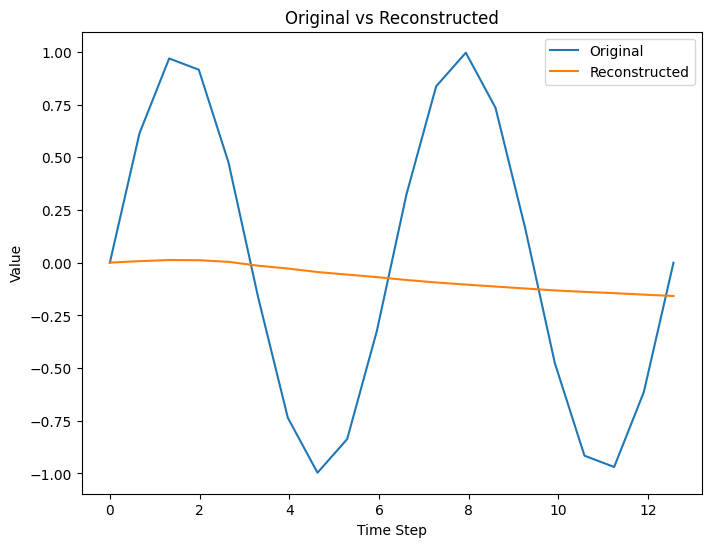

In [51]:
# Initialize model
model = LSTMAutoencoder(input_dim, hidden_dim, sequence_length, dropout=0.0)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Visualize the results
with torch.no_grad():
    reconstructed = model(data).numpy()

plt.figure(figsize=(8, 6))
plt.plot(t, data[0].numpy(), label='Original')
plt.plot(t, reconstructed[0], label='Reconstructed')
plt.legend()
plt.title('Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


class SimpleLSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, sequence_length):
        super(SimpleLSTMAutoencoder, self).__init__()
        
        # Encoder: a single LSTM layer
        self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        
        # Decoder: a single LSTM layer
        self.decoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        
        # Fully connected layer to map hidden state to the output dimension
        self.fc = nn.Linear(hidden_dim, input_dim)
        
        # Store sequence length for generating sequence in decoder
        self.sequence_length = sequence_length

    def forward(self, x):
        # Encoder
        _, (hidden, cell) = self.encoder(x)
        
        # Initialize decoder input as zeros (batch_size, 1, input_dim)
        decoder_input = torch.zeros(x.size(0), 1, x.size(2)).to(x.device)
        
        # Initialize output tensor list
        outputs = []
        
        # Decode step-by-step
        for _ in range(self.sequence_length):
            decoder_output, (hidden, cell) = self.decoder(decoder_input, (hidden, cell))
            output = self.fc(decoder_output)  # Map to input dimension
            outputs.append(output)
            decoder_input = output  # Set the next input to be the current output
        
        # Concatenate outputs along the sequence dimension
        outputs = torch.cat(outputs, dim=1)  # Shape: (batch_size, sequence_length, input_dim)
        return outputs


torch.Size([100, 20, 3])


In [ ]:

input_dim = 3
hidden_dim = 32
sequence_length = 20
batch_size = 100

# Initialize model
model = SimpleLSTMAutoencoder(input_dim, hidden_dim, sequence_length)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Generate periodic data with two patterns: sine and binary square wave
t = np.linspace(0, 4 * np.pi, sequence_length)
sin_data = np.sin(t).reshape(1, sequence_length, 1)  # Sine pattern

# Generate binary square wave pattern alternating between 0 and 1
binary_data = (np.sign(np.sin(t)) > 0).astype(float).reshape(1, sequence_length, 1)

#Generate zeros for the third dimension
zeros_data = np.zeros((1, sequence_length, 1))

# Stack the all patterns along the input dimension
data = np.concatenate((sin_data, binary_data, zeros_data), axis=2)  # Shape: (1, sequence_length, input_dim)
data = np.tile(data, (batch_size, 1, 1))  # Expand to batch size
data = torch.tensor(data, dtype=torch.float32)
print(data.shape)


Epoch [100/1000], Loss: 0.13926105201244354
Epoch [200/1000], Loss: 0.01058038230985403
Epoch [300/1000], Loss: 0.005612241569906473
Epoch [400/1000], Loss: 0.0017223453614860773
Epoch [500/1000], Loss: 0.0003425405884627253
Epoch [600/1000], Loss: 0.00010417382145533338
Epoch [700/1000], Loss: 3.2854630262590945e-05
Epoch [800/1000], Loss: 2.674951610970311e-05
Epoch [900/1000], Loss: 4.277640982763842e-06
Epoch [1000/1000], Loss: 7.595454462716589e-06


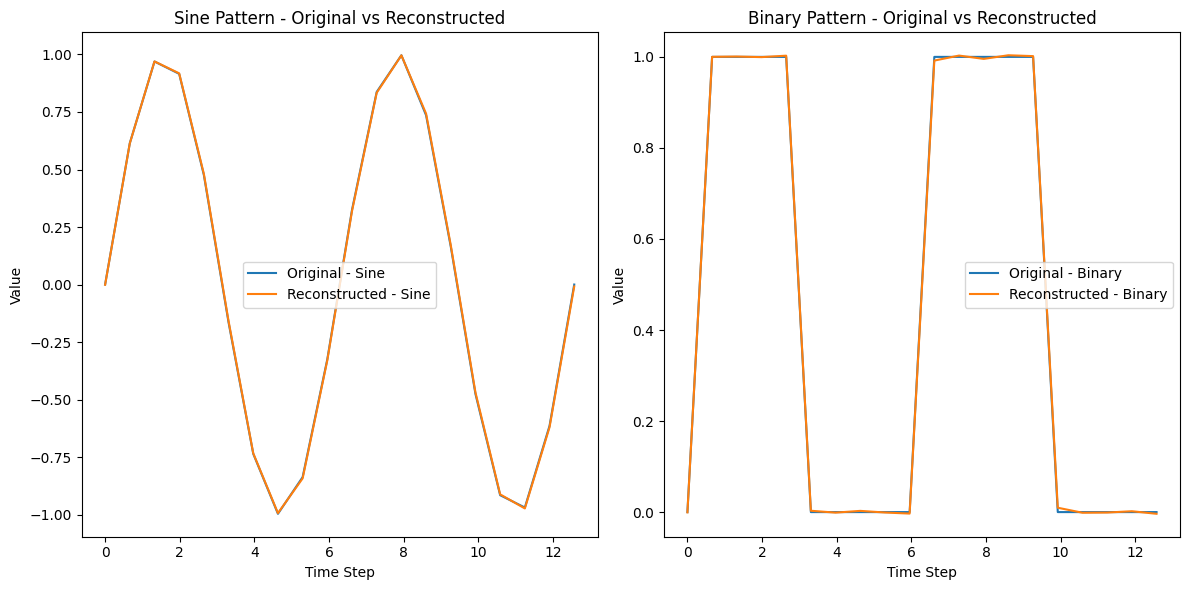

In [66]:

# Train the model
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = model(data)
    loss = criterion(output, data)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

# Visualize the results
with torch.no_grad():
    reconstructed = model(data).numpy()

# Plotting original vs reconstructed for each dimension
plt.figure(figsize=(12, 6))

# Sine pattern
plt.subplot(1, 2, 1)
plt.plot(t, data[0, :, 0].numpy(), label='Original - Sine')
plt.plot(t, reconstructed[0, :, 0], label='Reconstructed - Sine')
plt.legend()
plt.title('Sine Pattern - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Binary pattern
plt.subplot(1, 2, 2)
plt.plot(t, data[0, :, 1].numpy(), label='Original - Binary')
plt.plot(t, reconstructed[0, :, 1], label='Reconstructed - Binary')
plt.legend()
plt.title('Binary Pattern - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


(1000, 4)
torch.Size([986, 15, 4])
Pretrain Epoch 10/120, Loss: 0.010715355495772055, Total Loss: 0.3321760203689337
Pretrain Epoch 20/120, Loss: 0.0017243186424997065, Total Loss: 0.0534538779174909
Pretrain Epoch 30/120, Loss: 0.0009030455633276893, Total Loss: 0.02799441246315837
Pretrain Epoch 40/120, Loss: 0.0007670561486344424, Total Loss: 0.023778740607667714
Pretrain Epoch 50/120, Loss: 0.0006402790388693252, Total Loss: 0.01984865020494908
Pretrain Epoch 60/120, Loss: 0.0004955855462955492, Total Loss: 0.015363151935162023
Pretrain Epoch 70/120, Loss: 0.00031404419578686955, Total Loss: 0.009735370069392957
Pretrain Epoch 80/120, Loss: 0.0002078302481564723, Total Loss: 0.006442737692850642
Pretrain Epoch 90/120, Loss: 0.00015392293120854565, Total Loss: 0.004771610867464915
Pretrain Epoch 100/120, Loss: 0.00013588334531373073, Total Loss: 0.004212383704725653
Pretrain Epoch 110/120, Loss: 0.00011813030352876071, Total Loss: 0.003662039409391582
Pretrain Epoch 120/120, Loss: 0

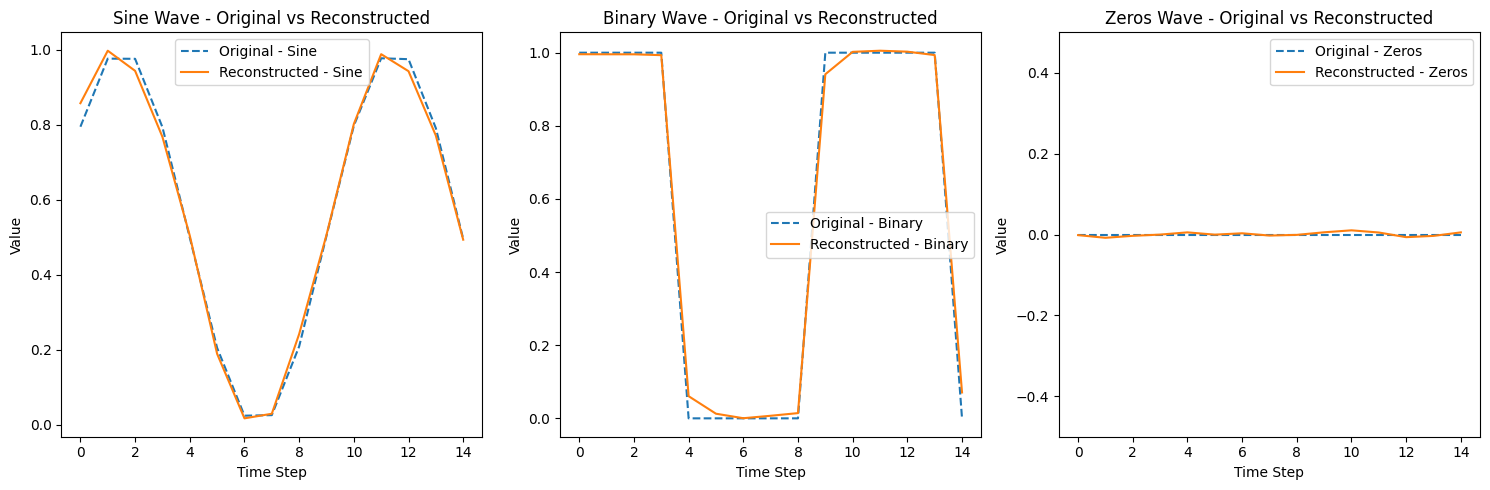

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# Define the MinMaxScaler
scaler = MinMaxScaler()

# Function to prepare data with sliding windows
def prepare_data(X, sequence_length):
    # Scale the data using MinMaxScaler
    X_scaled = scaler.fit_transform(X)  # Normalize data between 0 and 1
    
    # Convert the scaled data to a tensor
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
    
    # Calculate the number of sequences that can be created
    num_samples = X_tensor.shape[0] - sequence_length + 1
    num_features = X_tensor.shape[1]
    
    # Create a view with sliding windows of size (sequence_length, num_features)
    X_sequences = torch.zeros((num_samples, sequence_length, num_features), dtype=torch.float32)
    for i in range(num_samples):
        X_sequences[i] = X_tensor[i:i + sequence_length]
    print(X_sequences.shape)
    # Create a dataset
    dataset = TensorDataset(X_sequences)
    return dataset

# Generate continuous sine wave data
t = np.linspace(0, 200 * np.pi, 1000)  # Extend the range for a smoother wave
sin_data = np.sin(t).reshape(-1, 1)  # Shape: (1000, 1)

# Generate binary periodic data (square wave pattern)
binary_data = (np.sign(np.sin(t)) > 0).astype(float).reshape(-1, 1)  # Binary pattern alternating between 0 and 1

# Generate zeros data
zeros_data1 = np.zeros_like(sin_data)  # Shape: (1000, 1)
zeros_data2 = np.zeros_like(sin_data)  # Shape: (1000, 1)

# Combine all data into a single DataFrame
combined_data = np.hstack((sin_data, zeros_data1, binary_data, zeros_data2))
df = pd.DataFrame(combined_data, columns=['sin_wave', 'zeros_wave1', 'binary_wave', 'zeros_wave2'])
print(df.shape)

# Prepare data using the sliding window approach
sequence_length = 15
dataset = prepare_data(df, sequence_length)

# Convert dataset to DataLoader for batch processing
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize model parameters
input_dim = 4  # Three input features (sine wave, binary wave, zeros wave)
hidden_dim = 32
sequence_length = sequence_length

# Initialize model
model = SimpleLSTMAutoencoder(input_dim, hidden_dim, sequence_length)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

# Train the model
epochs = 120
for epoch in range(epochs):
    total_loss = 0
    for batch in dataloader:
        batch_data = batch[0]  # Extract the data from the dataset
        optimizer.zero_grad()
        output = model(batch_data)
        loss = criterion(output, batch_data)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    epoch_loss = total_loss / len(dataloader)
    if (epoch + 1) % 10 == 0:
        print(f"Pretrain Epoch {epoch+1}/{epochs}, Loss: {epoch_loss}, Total Loss: {total_loss}")


# Visualize the results with a sample from the dataset
with torch.no_grad():
    sample_input = dataset[1:2][0]  # Get the first sequence in the dataset
    reconstructed = model(sample_input).squeeze().numpy()

# Plotting original vs reconstructed for each dimension
plt.figure(figsize=(15, 5))

# Plot sine wave
plt.subplot(1, 3, 1)
plt.plot(sample_input.squeeze().numpy()[:, 0], label='Original - Sine', linestyle='--')
plt.plot(reconstructed[:, 0], label='Reconstructed - Sine')
plt.legend()
plt.title('Sine Wave - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Plot binary wave
plt.subplot(1, 3, 2)
plt.plot(sample_input.squeeze().numpy()[:, 2], label='Original - Binary', linestyle='--')
plt.plot(reconstructed[:, 2], label='Reconstructed - Binary')
plt.legend()
plt.title('Binary Wave - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Plot zeros wave
plt.subplot(1, 3, 3)
plt.plot(sample_input.squeeze().numpy()[:, 3], label='Original - Zeros', linestyle='--')
plt.plot(reconstructed[:, 1], label='Reconstructed - Zeros')
plt.legend()
plt.title('Zeros Wave - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


class SimpleLSTMAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, sequence_length):
        super(SimpleLSTMAutoencoder, self).__init__()
        
        # Encoder: a single LSTM layer
        self.encoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        
        # Decoder: a single LSTM layer
        self.decoder = nn.LSTM(input_dim, hidden_dim, num_layers=1, batch_first=True)
        
        # Fully connected layer to map hidden state to the output dimension
        self.fc = nn.Linear(hidden_dim, input_dim)
        
        # Store sequence length for generating sequence in decoder
        self.sequence_length = sequence_length

    def forward(self, x):
        # Encoder
        _, (hidden, cell) = self.encoder(x)
        
        # Initialize decoder input as zeros (batch_size, 1, input_dim)
        decoder_input = torch.zeros(x.size(0), 1, x.size(2)).to(x.device)
        
        # Initialize output tensor list
        outputs = []
        
        # Decode step-by-step
        for _ in range(self.sequence_length):
            decoder_output, (hidden, cell) = self.decoder(decoder_input, (hidden, cell))
            output = self.fc(decoder_output)  # Map to input dimension
            outputs.append(output)
            decoder_input = output  # Set the next input to be the current output
        
        # Concatenate outputs along the sequence dimension
        outputs = torch.cat(outputs, dim=1)  # Shape: (batch_size, sequence_length, input_dim)
        return outputs


torch.Size([100, 20, 3])


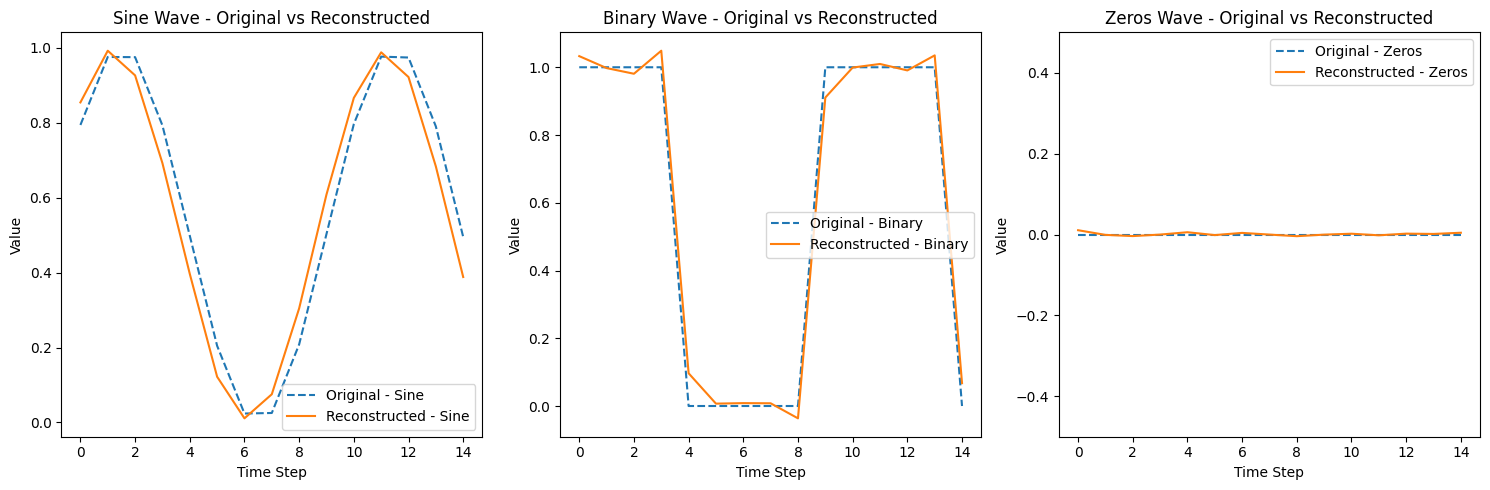

In [131]:
# Generate test data with a different sine wave
t_test = np.linspace(0, 10 * np.pi, 100)  # Different range for test data
sin_test_data = np.sin(t_test).reshape(-1, 1)  # Shape: (100, 1)

# Generate binary and zeros data for test set
binary_test_data = (np.sign(np.sin(t_test)) > 0).astype(float).reshape(-1, 1)
zeros_test_data = np.zeros_like(sin_test_data)

# Combine test data into a DataFrame
test_combined_data = np.hstack((sin_test_data, binary_test_data, zeros_test_data))
test_df = pd.DataFrame(test_combined_data, columns=['sin_wave', 'binary_wave', 'zeros_wave'])

# Prepare test data using the sliding window approach
test_dataset = prepare_data(test_df, sequence_length)

torch.Size([86, 15, 3])


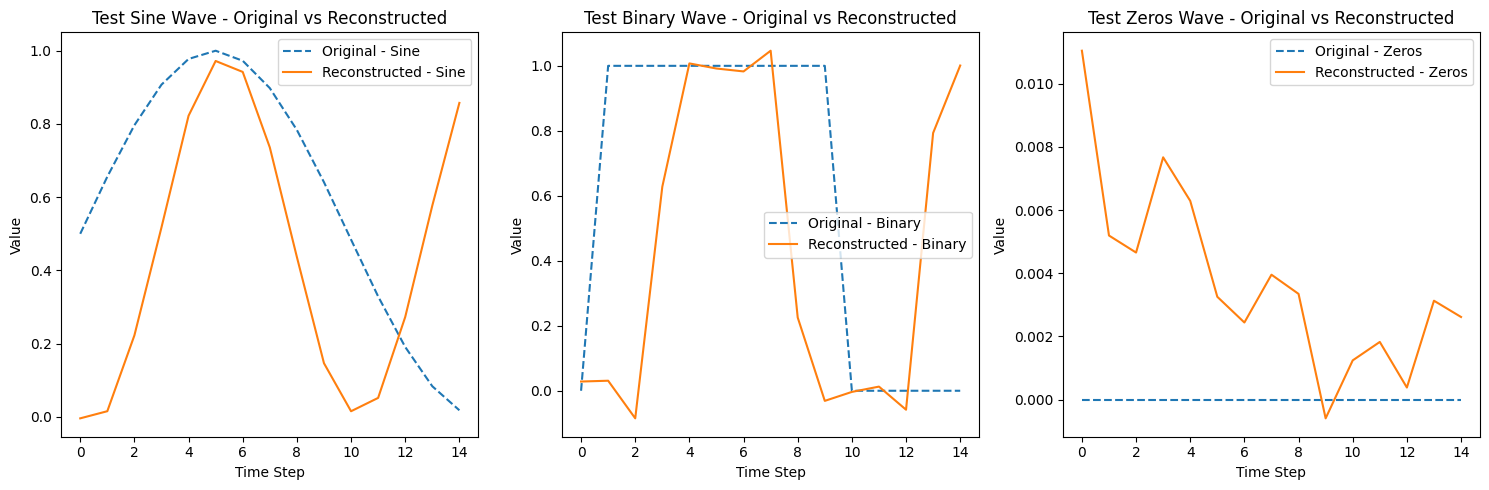

In [132]:
# Visualize the results with a sample from the test dataset
with torch.no_grad():
    sample_test_input = test_dataset[:1][0]  # Get the first sequence in the test dataset
    reconstructed_test = model(sample_test_input).squeeze().numpy()

# Plotting original vs reconstructed for each dimension
plt.figure(figsize=(15, 5))

# Plot sine wave
plt.subplot(1, 3, 1)
plt.plot(sample_test_input.squeeze().numpy()[:, 0], label='Original - Sine', linestyle='--')
plt.plot(reconstructed_test[:, 0], label='Reconstructed - Sine')
plt.legend()
plt.title('Test Sine Wave - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Plot binary wave
plt.subplot(1, 3, 2)
plt.plot(sample_test_input.squeeze().numpy()[:, 1], label='Original - Binary', linestyle='--')
plt.plot(reconstructed_test[:, 1], label='Reconstructed - Binary')
plt.legend()
plt.title('Test Binary Wave - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Plot zeros wave
plt.subplot(1, 3, 3)
plt.plot(sample_test_input.squeeze().numpy()[:, 2], label='Original - Zeros', linestyle='--')
plt.plot(reconstructed_test[:, 2], label='Reconstructed - Zeros')
plt.legend()
plt.title('Test Zeros Wave - Original vs Reconstructed')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()
